# Student Performance Analysis using Decision Trees
* By Wai Ping Jerry KWOK
* Created on 2023-09-18

**Objective**

In this project, students will employ data preprocessing techniques, build a decision tree classifier, and optimize the model using cross-validation and grid search. The aim is to understand the impact of various student attributes on their performance.

In [200]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [201]:
# disable warnings
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

##### 1. Loading Data & Basic Exploration

**a. Load the data from the given path into a pandas DataFrame**

In [202]:
# load the entire csv files as DataFrame using Pandas
df = pd.read_csv('student-por.csv', delimiter=';')

**Data Descriptions**
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

* these grades are related with the course subject Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

**b. How many rows are there in the dataset?**

In [203]:
# display the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [204]:
# display the number of rows and columns of the DataFrame
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 649
Number of columns: 33


In [205]:
# display the first 5 rows of the DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [206]:
# check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [207]:
# check for duplicate rows
df.duplicated().sum()

0

There are no duplicated entries and no missing values. 

##### 2. Data Transformation

**a. Combine the grades G1, G2, and G3 into a column called total_mark**

In [208]:
# combine the columns into one column
df['total_mark'] = df['G1'] + df['G2'] + df['G3']

**b. Create a new binary column called pass. If the total mark is below 35 for G1, G2, and G3, it should be labeled as 0 (fail), else 1 (pass)**

In [209]:
# create a new column with the specified condition
df['pass'] = df['total_mark'].apply(lambda x: 0 if x < 35 else 1)

**c. Drop the columns G1, G2, G3, and total_mark**

In [210]:
# drop the columns G1, G2, G3, and total_mark
df.drop(['G1', 'G2', 'G3', 'total_mark'], axis=1, inplace=True)

**d. How many columns are left after this operation?**

In [211]:
# display the first 5 rows of the DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [212]:
# display the number of columns after adding and dropping some columns
print(f'Number of columns after adding and dropping some columns: {df.shape[1]}')

Number of columns after adding and dropping some columns: 31


**e. How many students are in the data set?**

One entry represents one student. Therefore the number of student is same as the number of rows.

In [213]:
# display the number of rows and columns of the DataFrame
print(f'Number of students: {df.shape[0]}')

Number of students: 649


**f. How many students passed?**

In [214]:
# count the number of students who passed
print('Number of students passed:', df['pass'].sum())

Number of students passed: 328


**g. Discuss the data distribution**

In [215]:
# get the column names of numeric data
numeric_data = df.select_dtypes('number').columns
numeric_data

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'pass'],
      dtype='object')

In [216]:
# get descriptive statistics
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,0.505393
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,0.500357
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,1.000000


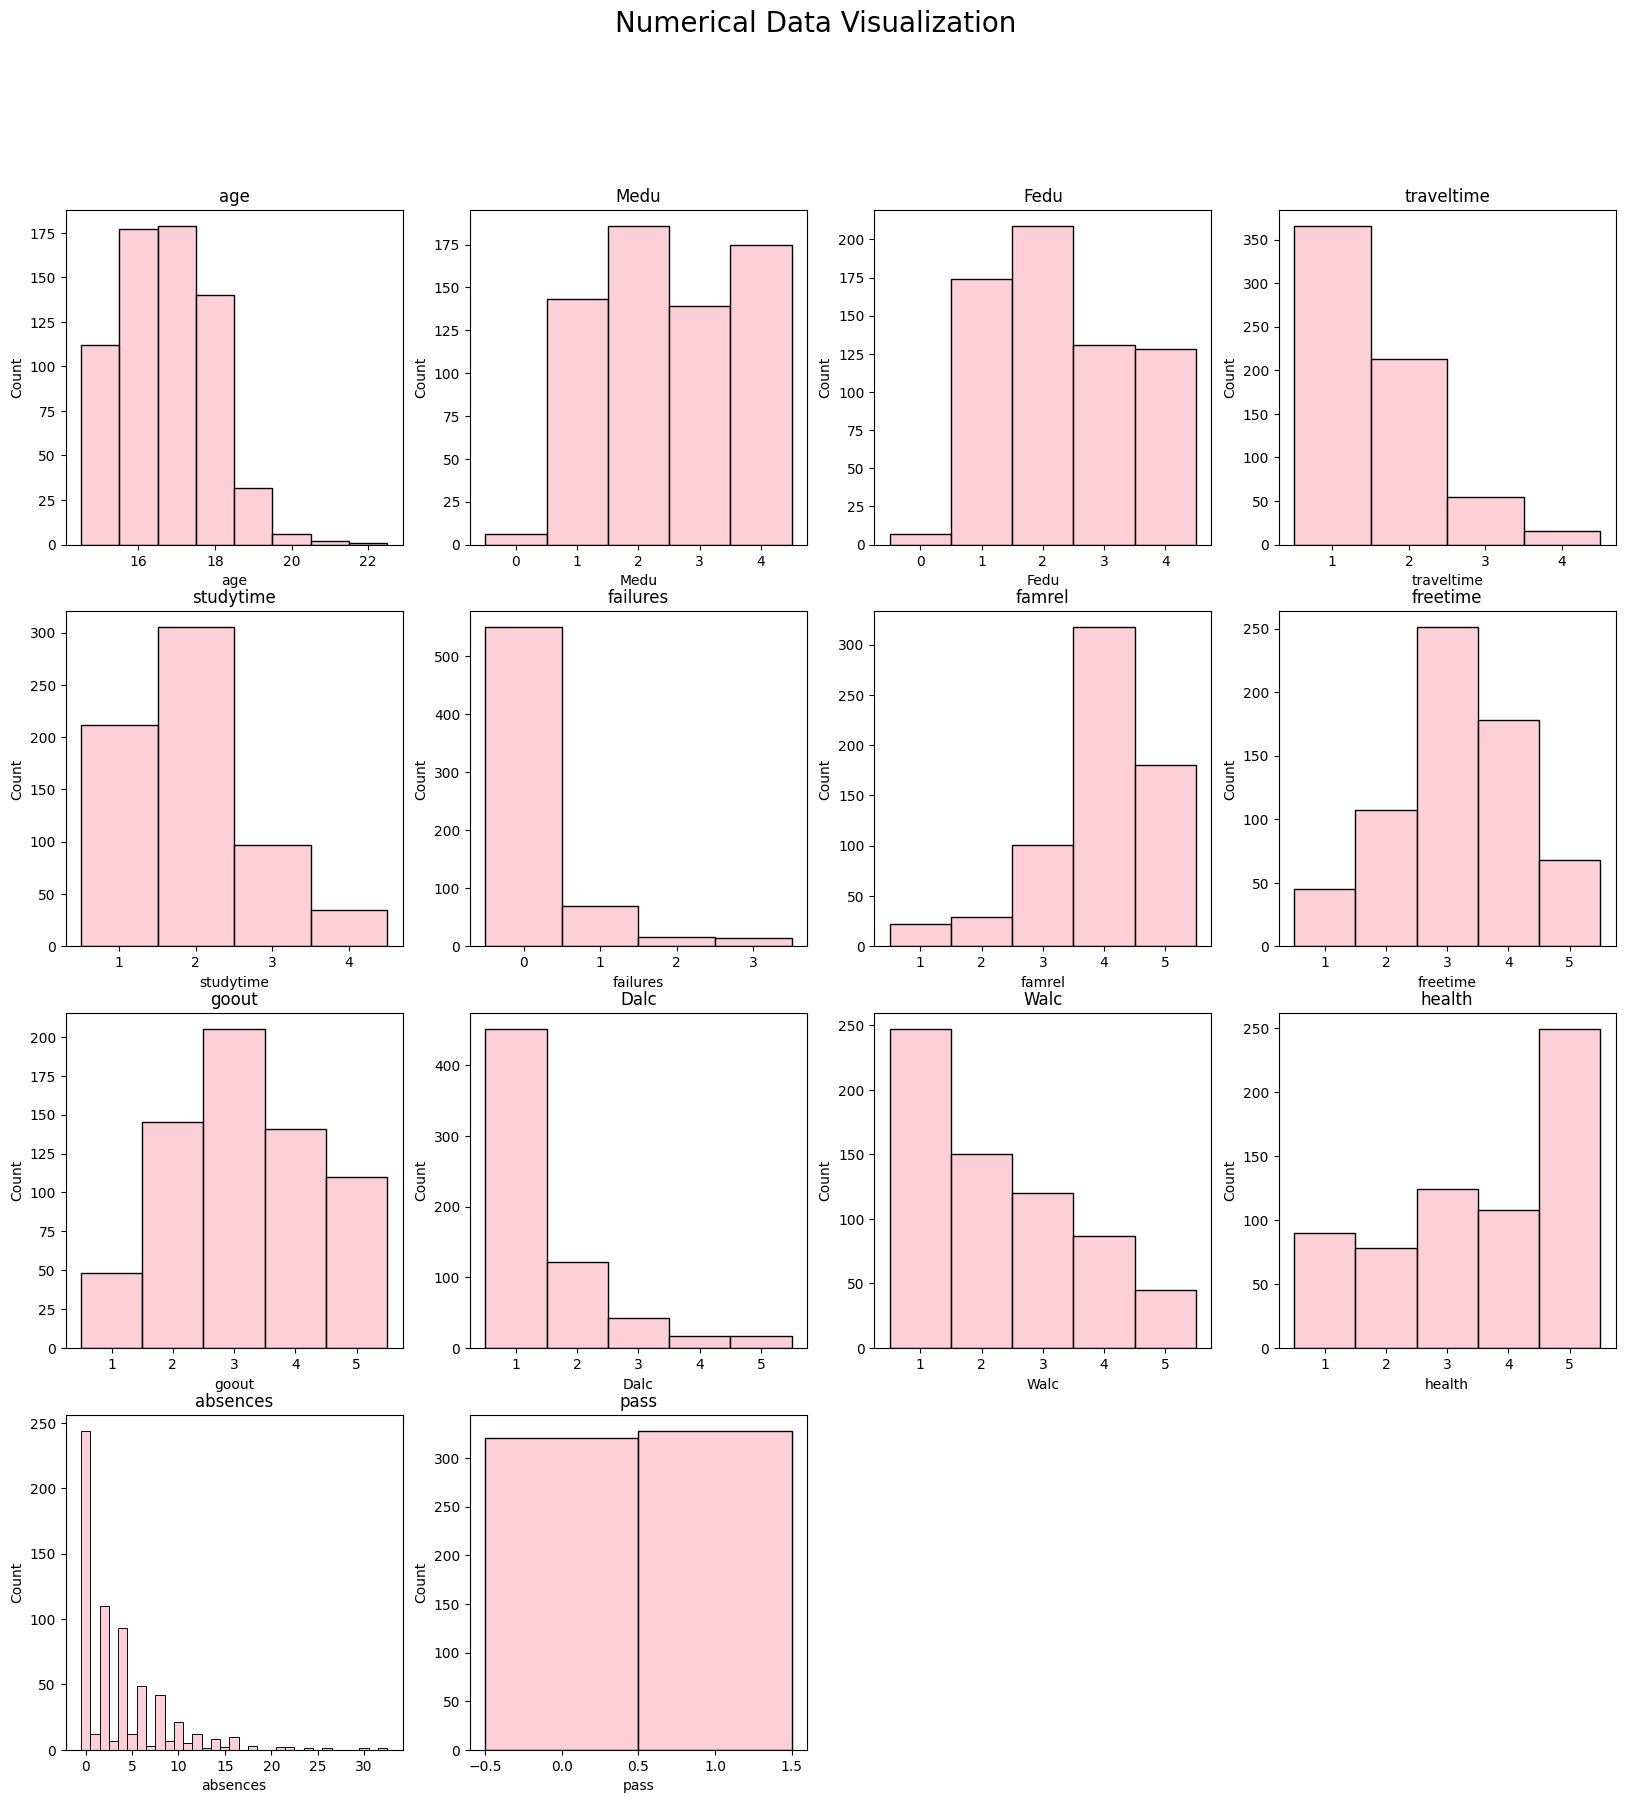

In [217]:
# display the data visualization of numerical data
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Data Visualization', fontsize=20)
k = 0
for i in numeric_data:
    ax = plt.subplot(4, 4, k+1)
    sns.histplot(x=df[i], discrete=True, color='pink', ax=ax)
    ax.set_title(i)
    k += 1

**Data Discussions**
1. age: The distribution of age is skewed to the left. The mode is 17.
2. medu: The distribution of medu is skewed to the right. The mode is 2. There are very few counts at value 0 while the counts of 1, 2, 3, 4 are quite close.
3. fedu: The distribution of fedu is skewed to the right. The mode is 2. There are very few counts at value 0.
4. traveltime: The distribution of traveltime is skewed to the left. The mode is 1. There are few counts at value 4.
5. studytime: The distribution of studytime is skewed to the left. The mode is 2. There are few counts at value 4.
6. failures: The distribution of failures is skewed to the left. The mode is 0. There are very few counts at value 2 and 3.
7. famrel: The distribution of famrel is skewed to the right. The mode is 4.
8. freetime: The distribution of freetime is not skewed. The mode is 3.
9. goout: The distribution of goout is not skewed. The mode is 3.
10. Dalc: The distribution of Dalc is skewed to the left. The mode is 1.  There are very few counts at value 4 and 5.
11. Walc: The distribution of Walc is skewed to the left. The mode is 1.
12. health: The distribution of health is skewed to the right. The mode is 5.
13. absences: The distribution of absences is skewed to the left. The mode is 0.
14. pass: The distribution of pass is balanced. There are almost the same number of pass and fail. Considering pass is the label, the dataset is balanced. 

##### 3. One-Hot Encoding

**a. Create a list called *mylist* for the categorical data**

In [218]:
# create a list called mylist for the categorical data
mylist = df.select_dtypes('object').columns

In [219]:
# show the list of categorical data
print(mylist)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


**b. Convert the categorical columns provided in the *mylist* variable into one-hot encoded columns. This will be useful when we build the decision tree.**

In [220]:
# perform one-hot encoding on the categorical data
ohc_df = pd.get_dummies(df, columns=mylist)

In [221]:
# display the first 5 rows of the One-Hot Encoded DataFrame
ohc_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


##### 4. Data Splitting

**a. Shuffle the dataset and split it into training and test sets. Use the first 500 rows for training and the rest for testing.**

In [222]:
# shuffle and then split the data into training and testing sets
# use first 500 rows for training 
df_train, df_test = train_test_split(ohc_df, train_size=500, random_state=38, shuffle=True)

**b. Separate the features and target variable (pass) for the training and test sets.**

In [223]:
# move the label column to a separate DF
y_train = df_train['pass']
y_test = df_test['pass']

# drop the label column from the original DF
X_train = df_train.drop('pass', axis=1)
X_test = df_test.drop('pass', axis=1)   

##### 5. Building the Decision Tree Model

**a. Use a decision tree classifier with criterion *entropy* and *max_depth* of 5.**

In [224]:
# create a decision tree classifier with the specified parameters
Classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=38)

**b. Fit the model on the training set.**

In [225]:
# fit the model
model = Classifier.fit(X_train, y_train)

**c. Score your tree.**

In [226]:
# evaluate the tree using accuracy on training set
accuracy = model.score(X_train, y_train)
print(f'Training Accuracy: {accuracy:.5f}')

Training Accuracy: 0.78400


**d. Give a visualization of the decision tree. Ensure the tree's features and class names are appropriately labeled.**

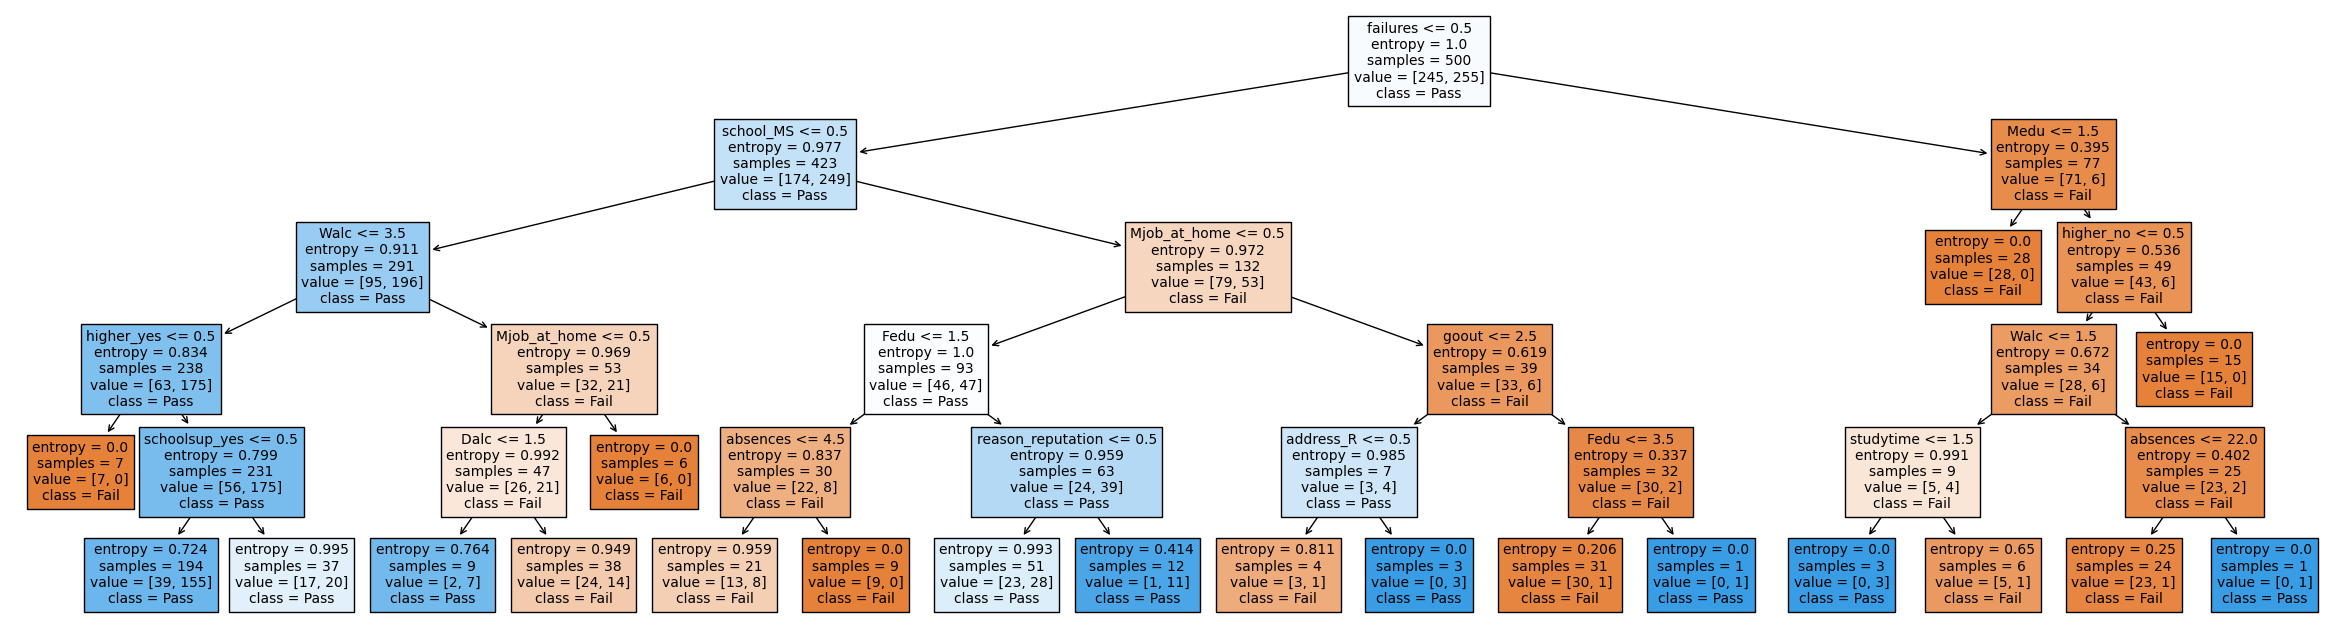

In [227]:
# plot the decision tree with feature names and class names
plt.figure(figsize=(30, 8))
tree.plot_tree(model, feature_names=list(X_test.columns), class_names=['Fail', 'Pass'], label='all', filled=True, fontsize=10)
plt.show()

**e. According to your tree, what are the top two level splitting features?**

From the tree, the first level splitting feature is 'failures' and the second level splitting feature is 'school_MS' and 'Medu'.

**f. Would *Gini* be appropriate here as well? Why?**

*Gini* would also be appropriate. *Gini* is another approach to dividing a decision tree by evaluating and choosing splits. Gini Impurity is the probability of misclassifying a randomly chosen element in a set. It can be interpreted as the expected error rate in the classifier. A Gini score of 0 is ideal which means that the node is pure and contains samples from only one class. Higher values indicate more impurities. *Gini* has a bias toward selecting splits that result in a more balanced distribution of classes. In this project, the dataset is balanced. Therefore, *Gini* would also be appropriate. 

##### 6. Model Evaluation using Cross-Validation

**a. Evaluate the model's performance using 5-fold cross-validation. Is accuracy an appropriate metric, why?**

*Accuracy* is the ratio of correctly predicted instances to the total instances in a data sets. It is intuitive and straight-forward to understand. It is a reliable metric especially when the dataset is balanced. In this project, the dataset is balanced. Therefore, *accuracy* is an appropriate metric.

In [228]:
# evaluate the model using 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=38)

# perform cross-validation on the model using the training set
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

**b. Report the mean accuracy and its +/-variance.**

In [250]:
# display the cross-validation results
print(f'Cross-validation results: {cv_results}')
print(f'Training Accuracy: {cv_results.mean():.5f} (± {cv_results.var():.5f})')

Cross-validation results: [0.56 0.65 0.73 0.61 0.71]
Training Accuracy: 0.65200 (± 0.00394)


##### 7. Hyperparameter Tuning

**a. Test the decision tree classifier with different max depths ranging from 1 to 20.**

**b. For each depth, evaluate the model using 5-fold cross-validation.**

In [230]:
# setup the k-fold cross-validation
kfold_ = KFold(n_splits=5, shuffle=True, random_state=38)

In [231]:
# run different depths of the tree with entropy and report the accuracy
for depth in range(1, 21):
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=38)
    model_entropy = clf_entropy.fit(X_train, y_train)
    # perform cross-validation on the model using the training set
    scores_entropy = cross_val_score(model_entropy, X_train, y_train, cv=kfold_, scoring='accuracy')
    print('Model with Entropy and Max depth: %d, Training Accuracy: %0.3f (± %0.3f)' %(depth, scores_entropy.mean(), scores_entropy.std()*2))

Model with Entropy and Max depth: 1, Training Accuracy: 0.640 (± 0.067)
Model with Entropy and Max depth: 2, Training Accuracy: 0.642 (± 0.043)
Model with Entropy and Max depth: 3, Training Accuracy: 0.668 (± 0.096)
Model with Entropy and Max depth: 4, Training Accuracy: 0.670 (± 0.083)
Model with Entropy and Max depth: 5, Training Accuracy: 0.652 (± 0.125)
Model with Entropy and Max depth: 6, Training Accuracy: 0.656 (± 0.075)
Model with Entropy and Max depth: 7, Training Accuracy: 0.668 (± 0.079)
Model with Entropy and Max depth: 8, Training Accuracy: 0.666 (± 0.073)
Model with Entropy and Max depth: 9, Training Accuracy: 0.676 (± 0.048)
Model with Entropy and Max depth: 10, Training Accuracy: 0.660 (± 0.102)
Model with Entropy and Max depth: 11, Training Accuracy: 0.666 (± 0.041)
Model with Entropy and Max depth: 12, Training Accuracy: 0.628 (± 0.056)
Model with Entropy and Max depth: 13, Training Accuracy: 0.618 (± 0.065)
Model with Entropy and Max depth: 14, Training Accuracy: 0.6

The best model with Entropy is with Max Depth as 9 with the highest training accuracy. The Training Accuracy is 0.676 (± 0.048).

In [232]:
# save the best Entropy model
clf_entropy_best = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=38)
model_entropy_best = clf_entropy_best.fit(X_train, y_train)

In [233]:
# evaluate the best entropy tree using accuracy by testing set
acc_entropy_best = model_entropy_best.score(X_test, y_test)
print(f'Testing Accuracy: {acc_entropy_best:.5f}')

Testing Accuracy: 0.65772


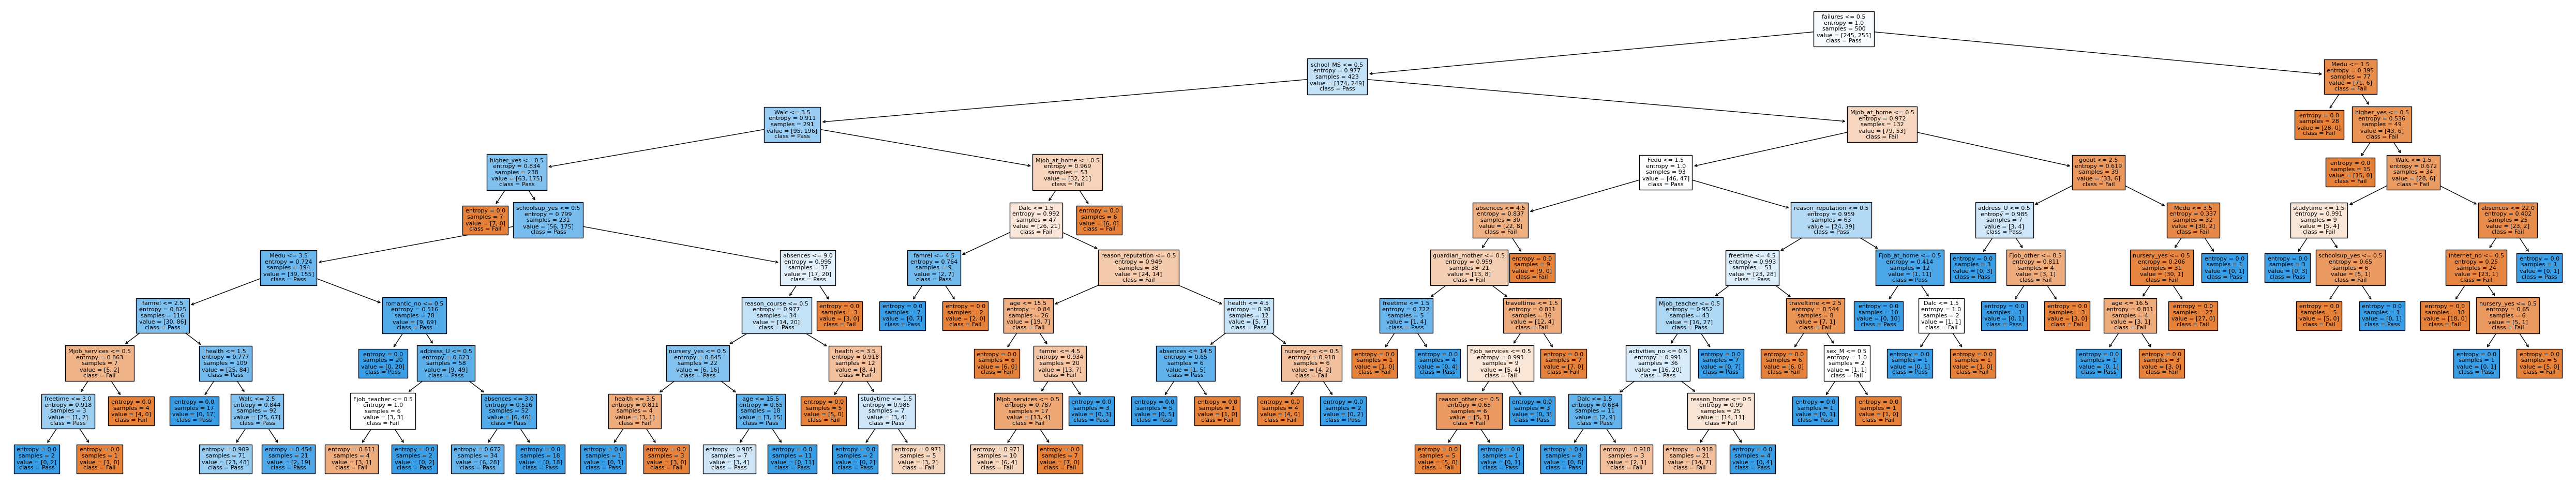

In [234]:
# display the decision tree with feature names and class names of the best Entropy model
plt.figure(figsize=(64, 12))
tree.plot_tree(model_entropy_best, feature_names=list(X_test.columns), class_names=['Fail', 'Pass'], label='all', filled=True, fontsize=8)
plt.show()

**c. Try gini, do you get better results? Do the top splitting features change from question 5f? Include *Gini* in your grid search.**

In [235]:
# run different depths of the tree with gini and report the accuracy
for depth in range(1, 21):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=38)
    model_gini = clf_gini.fit(X_train, y_train)
    scores_gini = cross_val_score(model_gini, X_train, y_train, cv=kfold_, scoring='accuracy')
    print('Model with Gini and Max depth: %d, Training Accuracy: %0.3f (+/- %0.3f)' %(depth, scores_gini.mean(), scores_gini.std()*2))

Model with Gini and Max depth: 1, Training Accuracy: 0.640 (+/- 0.067)
Model with Gini and Max depth: 2, Training Accuracy: 0.656 (+/- 0.069)
Model with Gini and Max depth: 3, Training Accuracy: 0.684 (+/- 0.111)
Model with Gini and Max depth: 4, Training Accuracy: 0.698 (+/- 0.105)
Model with Gini and Max depth: 5, Training Accuracy: 0.670 (+/- 0.133)
Model with Gini and Max depth: 6, Training Accuracy: 0.672 (+/- 0.079)
Model with Gini and Max depth: 7, Training Accuracy: 0.664 (+/- 0.109)
Model with Gini and Max depth: 8, Training Accuracy: 0.676 (+/- 0.082)
Model with Gini and Max depth: 9, Training Accuracy: 0.644 (+/- 0.088)
Model with Gini and Max depth: 10, Training Accuracy: 0.636 (+/- 0.077)
Model with Gini and Max depth: 11, Training Accuracy: 0.638 (+/- 0.121)
Model with Gini and Max depth: 12, Training Accuracy: 0.642 (+/- 0.085)
Model with Gini and Max depth: 13, Training Accuracy: 0.626 (+/- 0.109)
Model with Gini and Max depth: 14, Training Accuracy: 0.616 (+/- 0.069)
M

The best model with Gini is with Max Depth as 4 with the highest training accuracy. The Training Accuracy is 0.698 (+/- 0.105)

In [236]:
# save the best gini model
clf_gini_best = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=38)
model_gini_best = clf_gini_best.fit(X_train, y_train)

In [237]:
# evaluate the best gini tree using accuracy by testing set
acc_gini_best = model_gini_best.score(X_test, y_test)
print(f'Testing Accuracy: {acc_gini_best:.5f}')

Testing Accuracy: 0.65772


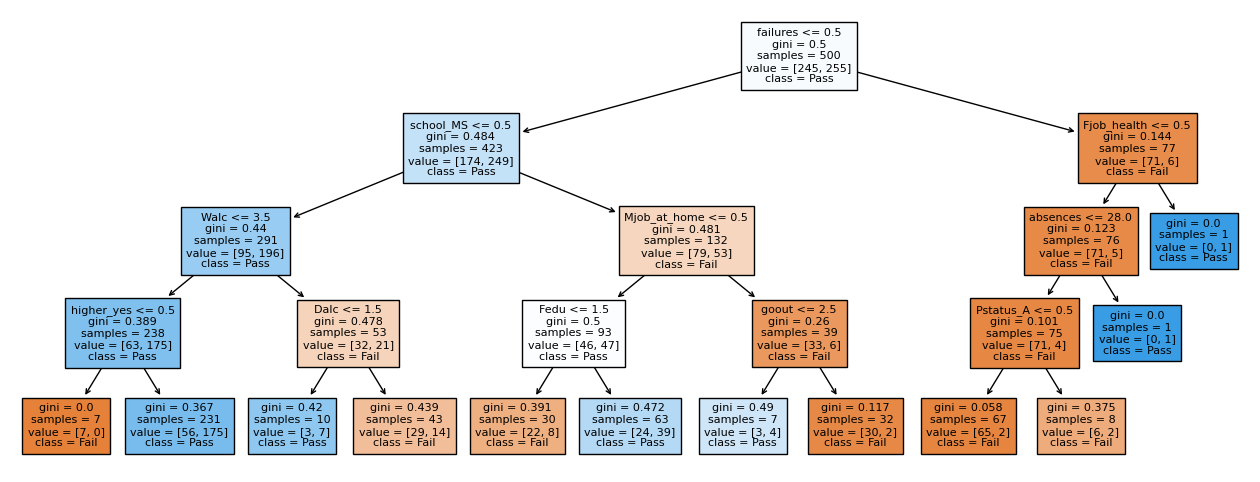

In [238]:
# display the decision tree with feature names and class names of the best model
plt.figure(figsize=(16, 6))
tree.plot_tree(model_gini_best, feature_names=list(X_test.columns), class_names=['Fail', 'Pass'], label='all', filled=True, fontsize=8)
plt.show()

* As from the tree plots, the top two splitting features are different for *Entropy* and *Gini*. For *Entropy*, they are 'failures', 'school_MS' and 'Medu'. For *Gini*, they are 'failures', 'school_MS' and 'Fjob_health'.
* Using *Entropy*,  the best model is with max depth 9 and the Testing Accuracy is 0.65772.
* Using *Gini*, the best model is with max depth 4 and the Testing Accuracy is 0.65772.
* Therefore, using *Gini* does not give a better result, as the accuracy using the testing set is the same for both *Entropy* and *Gini* in this case.

##### 8. Entropy and Gini

**a. Write Python code that calculates the entropy of a dataset D. You may assume that the classes are comprised of integers. Include printouts of the test cases.**

In [239]:
# define a function to make unique value and count pairs
def unique_count_pairs(list_of_values):
    # make an empty dict to store the unique values
    unique_values = {}
    # loop through the list of values
    for value in list_of_values:
        # check if the value is not in the unique values dict as a key
        if value not in unique_values.keys():
            # add the value as a key to the unique values dict
            unique_values[value] = 1
        else:
            # increase the value by 1
            unique_values[value] += 1
    # return the unique values dict
    return unique_values

In [240]:
# define a function to calculate the entropy of a list of values
def calculate_entropy(list_of_values):
    # get the unique values and their counts
    unique_values = unique_count_pairs(list_of_values)
    # calculate the entropy
    entropy = 0
    # loop through the unique values dict
    for k in unique_values:
        # calculate the probability of each unique value
        p = unique_values[k] / len(list_of_values)
        # calculate the entropy
        entropy += p * np.log2(p)
    # output the entropy
    print(f'The Entropy of {list_of_values} is: {-entropy:.5f}')

In [241]:
# setup the test cases
test_case_1 = [1,2,2,3,3,3]
test_case_2 = [1,1,1,1,1,1,1,1,1,1]
test_case_3 = [2,3]

In [242]:
# test on test case 1
calculate_entropy(test_case_1)

The Entropy of [1, 2, 2, 3, 3, 3] is: 1.45915


In [243]:
# test on test case 2
calculate_entropy(test_case_2)

The Entropy of [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] is: -0.00000


In [244]:
# test on test case 3
calculate_entropy(test_case_3)

The Entropy of [2, 3] is: 1.00000


**b. Write Python code that calculates the Gini of a non-empty dataset D. You may assume that the classes are comprised of integers. Include the definitions of both Entropy and Gini. Comment your code. Include printouts of the test cases.**

**Entropy** measures the uncertainty or the randomness within a dataset. It is defined as 

![Alt text](image-1.png) 

where p is the probability of each possible outcome and K is the total count of possible outcome.

**Gini Impurity** measures how often a randomly chosen element would be incorrectly classified. It is defined as 

![Alt text](image.png)

where p is the probability of each possible outcome and K is the total count of possible outcome.

In [245]:
# define a function to calculate the Gini Impurity of a list of values
def calculate_gini(list_of_values):
    # get the unique values and their counts
    unique_values = unique_count_pairs(list_of_values)
    # calculate the gini impurity
    gini = 0
    # loop through the unique values dict
    for k in unique_values:
        # calculate the fraction of samples classified under each class
        p = unique_values[k] / len(list_of_values)
        # calculate the gini impurity for one class
        gini += p ** 2
    # output the entropy
    print(f'The Gini of {list_of_values} is: {1-gini:.5f}')

In [246]:
# define a function to carry out the tests
def show_both(list_of_values):
    # calculate the entropy
    calculate_entropy(list_of_values)
    # calculate the gini impurity
    calculate_gini(list_of_values)

In [247]:
# test on test case 1
show_both(test_case_1)

The Entropy of [1, 2, 2, 3, 3, 3] is: 1.45915
The Gini of [1, 2, 2, 3, 3, 3] is: 0.61111


In [248]:
# test on test case 2
show_both(test_case_2)

The Entropy of [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] is: -0.00000
The Gini of [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] is: 0.00000


In [249]:
# test on test case 3
show_both(test_case_3)

The Entropy of [2, 3] is: 1.00000
The Gini of [2, 3] is: 0.50000
